# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


## Model Choice

[Explain why you've chosen a particular model as the baseline. This could be a simple statistical model or a basic machine learning model. Justify your choice.]


## Feature Selection

[Indicate which features from the dataset you will be using for the baseline model, and justify your selection.]


In [4]:

# Splitting the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Implementation

[Implement your baseline model here.]



In [44]:
# Initialize the baseline model
# Your implementation code here
# Define the model
import tensorflow as tf
#from tensorflow.keras import layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,762 (28.48 MB)

 Trainable params: 7,466,762 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Define the paths to the folders containing the image data
train_data_dir = '../Dataset/train_cleaned_scaled/train/'
#validation_data_dir = '../Dataset/train_cleaned_scaled/val/'

# Set the parameters for image data generation
batch_size = 64
img_height = 256
img_width = 256
# Load the training data from the folders
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256))


# Load the validation data from the folders
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_data_dir,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=64,
    image_size=(256, 256))

Found 2852 files belonging to 10 classes.
Found 2852 files belonging to 10 classes.


In [36]:

# # Get an element from the train dataset
# element = next(iter(train_ds.take(1)))

# # Access the input and target tensors
# input_tensor, target_tensor = element

# # Print the shapes of the tensors
# print("Input tensor shape:", input_tensor.shape)
# print("Target tensor shape:", target_tensor.shape)



Input tensor shape: (64, 256, 256, 3)
Target tensor shape: (64,)


In [45]:
# Train the network using the loaded data
import time
name = "training_" + time.strftime("%Y%m%d-%H%M")
csv_logger =  tf.keras.callbacks.CSVLogger(name+'.csv', append=True, separator=';')
model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[csv_logger])
print("Training complete!")

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.1216 - loss: 172.7705 - val_accuracy: 0.2970 - val_loss: 1.9793
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.2924 - loss: 1.9887 - val_accuracy: 0.5519 - val_loss: 1.3768
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5326 - loss: 1.4003 - val_accuracy: 0.7072 - val_loss: 0.9742
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7012 - loss: 0.9183 - val_accuracy: 0.8264 - val_loss: 0.6065
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8045 - loss: 0.6212 - val_accuracy: 0.8590 - val_loss: 0.4940
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8671 - loss: 0.5180 - val_accuracy: 0.9239 - val_loss: 0.3235
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8826 - loss: 0.4139 - val_accuracy: 0.9292 - val_loss: 0.3086
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9194 - loss: 0.3104 - val_accuracy: 0.9478 - val_los

Text(0, 0.5, 'Accuracy')

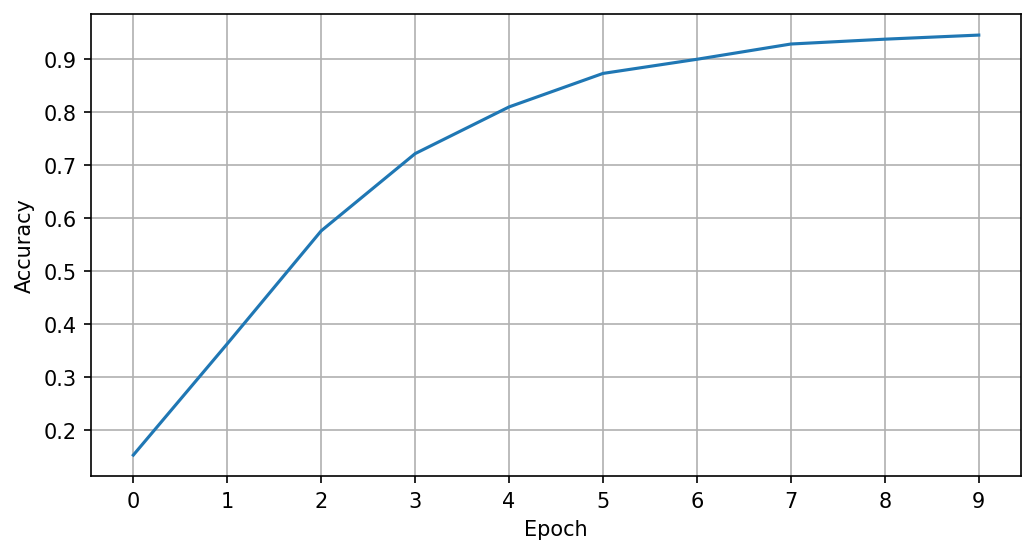

In [52]:
import matplotlib.pyplot as plt

train_acc = model.history.history['accuracy']
plt.figure(figsize=(8, 4), dpi=150)
plt.plot(train_acc)
plt.grid()
plt.xticks(range(0, 10))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

## Evaluation

[Clearly state what metrics you will use to evaluate the model's performance. These metrics will serve as a starting point for evaluating more complex models later on.]



In [6]:
# Evaluate the baseline model
# Example for a classification problem
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# For a regression problem, you might use:
# mse = mean_squared_error(y_test, y_pred)

# Your evaluation code here
